In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
!pip install ucimlrepo


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [ ]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Average_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,10.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,12.0


In [ ]:
print(X.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')


In [ ]:
X["G1"]=y["G1"]
X["G2"]=y["G2"]


/tmp/ipython-input-3492994353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["G1"]=y["G1"]
/tmp/ipython-input-3492994353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["G2"]=y["G2"]


In [ ]:
X["Average_grade"] = (y["G1"] + y["G2"] ) / 2
X["Average_grade"].head()

,Average_grade
0,5.5
1,10.0
2,12.5
3,14.0
4,12.0


In [ ]:
y.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [ ]:
X.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [7]:
# Create categorical target variable based on G3
def categorize_risk(g):
    if g < 10:
        return "High Risk"
    elif g <= 13:
        return "Medium Risk"
    else:
        return "Low Risk"

# transformation
y["Risk_Level"] = y["G3"].apply(categorize_risk)

# distribution of categories
print(y["Risk_Level"].value_counts())


Risk_Level
Medium Risk    355
Low Risk       194
High Risk      100
Name: count, dtype: int64


/tmp/ipython-input-3042847672.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Risk_Level"] = y["G3"].apply(categorize_risk)


/tmp/ipython-input-2833699946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=X, palette="pastel")


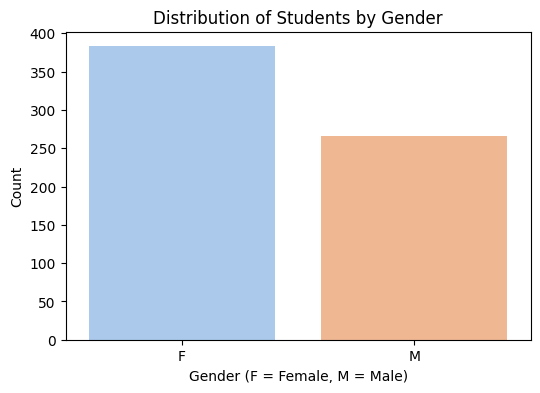

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x="sex", data=X, palette="pastel")
plt.title("Distribution of Students by Gender")
plt.xlabel("Gender (F = Female, M = Male)")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-4029544323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk_Level', data=y, palette="Set2")


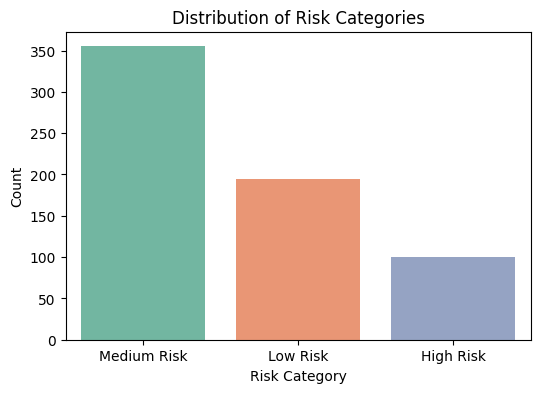

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Risk_Level', data=y, palette="Set2")
plt.title("Distribution of Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

          G1        G2        G3
G1  1.000000  0.864982  0.826387
G2  0.864982  1.000000  0.918548
G3  0.826387  0.918548  1.000000


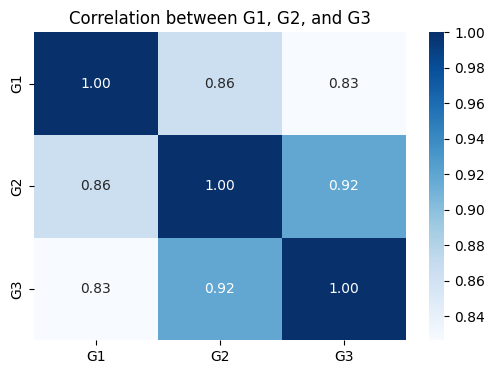

In [ ]:

grades = y[["G1", "G2"]].copy()
grades["G3"] = y["G3"]

# Compute correlation matrix
corr_matrix = grades.corr()

# Display correlation values
print(corr_matrix)

# Heatmap visualization
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation between G1, G2, and G3")
plt.show()


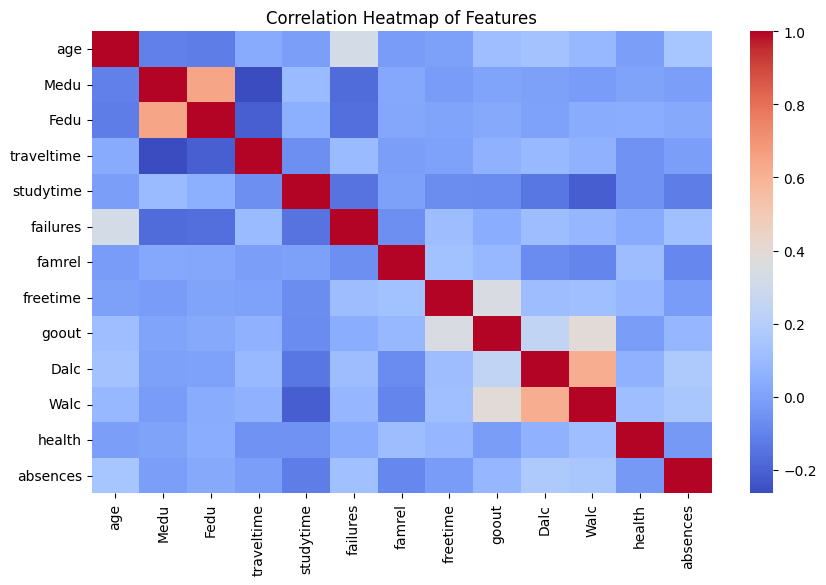

In [11]:
plt.figure(figsize=(10,6))
corr = X.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


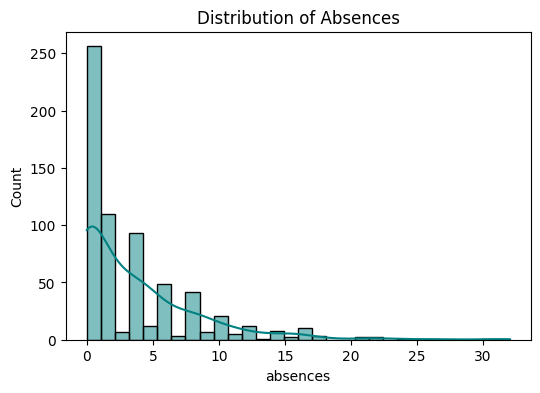

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(X["absences"], bins=30, kde=True, color="teal")
plt.title("Distribution of Absences")
plt.show()


In [ ]:
y = y.drop(columns=["G1", "G2"])
y.head()

,G3
0,11
1,11
2,12
3,14
4,13


In [8]:
y.head()


,G1,G2,G3,Risk_Level
0,0,11,11,Medium Risk
1,9,11,11,Medium Risk
2,12,13,12,Medium Risk
3,14,14,14,Low Risk
4,11,13,13,Medium Risk


In [ ]:
# safest approach
X = X.copy()

# now add the feature
X.loc[:, "parent_edu_avg"] = (X["Medu"] + X["Fedu"]) / 2




In [ ]:
X["attendance_ratio"] = 1 - (X["absences"] / 200)


In [ ]:
X["support_index"] = X[["schoolsup", "famsup"]].apply(lambda x: sum(x == "yes"), axis=1)


In [ ]:
X["leisure_score"] = X["freetime"] + X["goout"] - (X["Dalc"] + X["Walc"])


In [ ]:

X["study_commitment"] = X["studytime"] - X["failures"]


In [ ]:
X["high_absentee"] = (X["absences"] > 15).astype(int)
X["multiple_failures"] = (X["failures"] > 1).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split

# Use Risk_Level as target
y_target = y["Risk_Level"]

# Train/test split (80/20) with stratification to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y_target,
    test_size=0.2,
    random_state=42,
    stratify=y_target
)



X_train, X_test, y_train, y_test = train_test_split(
    X, y["Risk_Level"],
    test_size=0.2,
    stratify=y["Risk_Level"],
    random_state=42
)


print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Class distribution in train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test:")
print(y_test.value_counts(normalize=True))


Train set size: 519
Test set size: 130
Class distribution in train:
Risk_Level
Medium Risk    0.547206
Low Risk       0.298651
High Risk      0.154143
Name: proportion, dtype: float64

Class distribution in test:
Risk_Level
Medium Risk    0.546154
Low Risk       0.300000
High Risk      0.153846
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric features
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns

# Initialize scaler
scaler = MinMaxScaler()

# Fit on training data and transform both train & test
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("Scaled numeric features:")
print(X_train[numeric_features].head())


Scaled numeric features:
          age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
318  0.428571  0.75  0.50    0.333333   0.333333       0.0    0.75      0.00   
20   0.000000  1.00  0.75    0.000000   0.333333       0.0    0.75      0.75   
190  0.142857  0.50  0.50    0.333333   0.333333       0.0    0.50      0.75   
218  0.142857  0.50  0.50    0.333333   1.000000       0.0    1.00      0.50   
286  0.285714  0.50  0.25    0.000000   0.000000       0.0    0.75      0.75   

     goout  Dalc  Walc  health  absences        G1        G2  Average_grade  \
318   0.00  0.00  0.00     1.0       0.5  0.631579  0.473684        0.50000   
20    0.00  0.00  0.00     0.0       0.0  0.631579  0.684211        0.62500   
190   0.75  0.00  0.75     1.0       0.0  0.684211  0.631579        0.62500   
218   1.00  0.00  0.00     1.0       0.2  0.684211  0.684211        0.65625   
286   0.25  0.25  0.75     1.0       0.0  0.631579  0.631579        0.59375   

     parent_edu_avg

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical features
categorical_features = X_train.select_dtypes(include=["object"]).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)


# Fit on training categorical data and transform both train & test
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert encoded arrays back to DataFrames with proper column names
import pandas as pd
encoded_cols = encoder.get_feature_names_out(categorical_features)

X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)


X_train = pd.concat([X_train.drop(columns=categorical_features), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_features), X_test_encoded], axis=1)

print("Final Train shape:", X_train.shape)
print("Final Test shape:", X_test.shape)


Final Train shape: (519, 61)
Final Test shape: (130, 61)


In [ ]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
318,0.428571,0.75,0.50,0.333333,0.333333,0.0,0.75,0.00,0.00,0.00,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
20,0.000000,1.00,0.75,0.000000,0.333333,0.0,0.75,0.75,0.00,0.00,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
190,0.142857,0.50,0.50,0.333333,0.333333,0.0,0.50,0.75,0.75,0.00,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
218,0.142857,0.50,0.50,0.333333,1.000000,0.0,1.00,0.50,1.00,0.00,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
286,0.285714,0.50,0.25,0.000000,0.000000,0.0,0.75,0.75,0.25,0.25,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# --------------------------
# 1. Initialize Models
# --------------------------
models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

# --------------------------
# 2. Train & Evaluate Models
# --------------------------
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)           # Train
    y_pred = model.predict(X_test)        # Predict

    # Store evaluation metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted")
    }

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

# --------------------------
# 3. Display Results
# --------------------------
import pandas as pd

results_df = pd.DataFrame(results).T
display(results_df)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Classification Report:
              precision    recall  f1-score   support

   High Risk       0.50      0.40      0.44        20
    Low Risk       0.89      0.82      0.85        39
 Medium Risk       0.76      0.83      0.79        71

    accuracy                           0.76       130
   macro avg       0.72      0.68      0.70       130
weighted avg       0.76      0.76      0.76       130


Decision Tree Classification Report:
              precision    recall  f1-score   support

   High Risk       0.68      0.65      0.67        20
    Low Risk       0.70      0.82      0.75        39
 Medium Risk       0.78      0.72      0.75        71

    accuracy                           0.74       130
   macro avg       0.72      0.73      0.72       130
weighted avg       0.74      0.74      0.74       130


Random Forest Classification Report:
              precision    recall  f1-score   support

   High Risk       0.79      0.55      0.65        20
    Low R

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.761538,0.756706,0.761538,0.756901
Decision Tree,0.738462,0.742480,0.738462,0.738062
Random Forest,0.846154,0.848751,0.846154,0.841407
SVM,0.653846,0.665062,0.653846,0.616643


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(class_weight="balanced", random_state=42),
                    param_grid, cv=5, scoring="f1_macro", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)


Best params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.8207321642141954


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid.best_estimator_.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_acc)


Test accuracy: 0.8461538461538461


In [ ]:
from joblib import dump

# Extract best model
best_model = grid.best_estimator_
print(best_model)

# Save it
dump(best_model, "best_rf_model.pkl")


RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=42)


['best_rf_model.pkl']

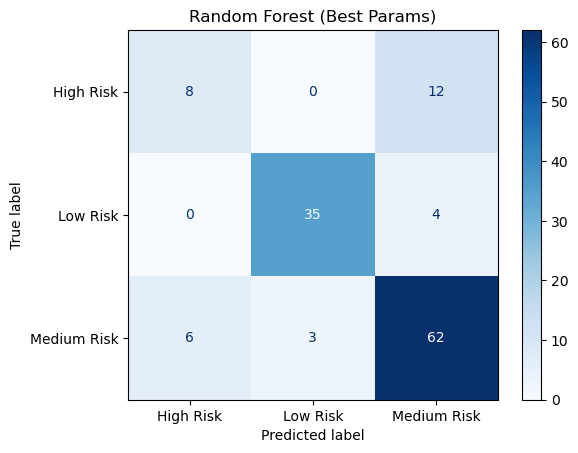

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = grid.best_estimator_.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Random Forest (Best Params)")
plt.show()


In [ ]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e3/f8/9246d3c7e185a29d7359d8b12b3d70bf2c3150ecf1427ec1382290e71a56/tensorflow-2.20.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.20.0-cp311-cp311-win_amd64.whl.metadata (4.6 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/8f/aa/ba0014cc4659328dc818a28827be78e6d97312ab0cb98105a770924dc11e/absl_py-2.3.1-py3-none-any.whl.metadata
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.3.2 which is incompatible.
scipy 1.11.1 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.3.2 which is incompatible.


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode string labels to integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# One-hot encode
y_train_nn = to_categorical(y_train_enc)
y_test_nn = to_categorical(y_test_enc)



In [ ]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
318,0.428571,0.75,0.50,0.333333,0.333333,0.0,0.75,0.00,0.00,0.00,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
20,0.000000,1.00,0.75,0.000000,0.333333,0.0,0.75,0.75,0.00,0.00,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
190,0.142857,0.50,0.50,0.333333,0.333333,0.0,0.50,0.75,0.75,0.00,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
218,0.142857,0.50,0.50,0.333333,1.000000,0.0,1.00,0.50,1.00,0.00,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
286,0.285714,0.50,0.25,0.000000,0.000000,0.0,0.75,0.75,0.25,0.25,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
# --------------------------
# Step 6: Deep Learning Model (Keras/TensorFlow)
# --------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# One-hot encode target for Keras
from tensorflow.keras.utils import to_categorical
y_train_nn = to_categorical(y_train_enc)
y_test_nn = to_categorical(y_test_enc)

# Build a simple neural network
nn_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),          # input layer
    layers.Dense(64, activation="relu"),              # hidden layer 1
    layers.Dropout(0.3),                              # regularization
    layers.Dense(32, activation="relu"),              # hidden layer 2
    layers.Dense(y_train_nn.shape[1], activation="softmax")  # output layer (multi-class)
])

# Compile model
nn_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train model
history = nn_model.fit(
    X_train, y_train_nn,
    validation_data=(X_test, y_test_nn),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate
loss, acc = nn_model.evaluate(X_test, y_test_nn, verbose=0)
print(f"Neural Network Accuracy: {acc:.4f}")


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4697 - loss: 1.0599 - val_accuracy: 0.5615 - val_loss: 0.9770
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5451 - loss: 0.9686 - val_accuracy: 0.5385 - val_loss: 0.9485
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5659 - loss: 0.9384 - val_accuracy: 0.5538 - val_loss: 0.9342
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5732 - loss: 0.8818 - val_accuracy: 0.5538 - val_loss: 0.9184
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5651 - loss: 0.8850 - val_accuracy: 0.5769 - val_loss: 0.9049
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5654 - loss: 0.8845 - val_accuracy: 0.5692 - val_loss: 0.8974
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5686 - loss: 0.8301 - val_accuracy: 0.5692 - val_loss: 0.8951
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6015 - loss: 0.8225 - val_accuracy: 0.5692 - val_loss

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# One-hot encode target for Keras
from tensorflow.keras.utils import to_categorical
y_train_nn = to_categorical(y_train_enc)
y_test_nn = to_categorical(y_test_enc)

# Build a simpler + regularized neural network
nn_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(y_train_nn.shape[1], activation="softmax")
])

# Compile model
nn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, verbose=1
)

# Train model
history = nn_model.fit(
    X_train, y_train_nn,
    validation_data=(X_test, y_test_nn),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# Evaluate
loss, acc = nn_model.evaluate(X_test, y_test_nn, verbose=0)
print(f"Improved Neural Network Accuracy: {acc:.4f}")


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3821 - loss: 1.7972 - val_accuracy: 0.5462 - val_loss: 1.6197 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4223 - loss: 1.6967 - val_accuracy: 0.5615 - val_loss: 1.5642 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4488 - loss: 1.6470 - val_accuracy: 0.5462 - val_loss: 1.5188 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4912 - loss: 1.5449 - val_accuracy: 0.5462 - val_loss: 1.4786 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5172 - loss: 1.5344 - val_accuracy: 0.5462 - val_loss: 1.4477 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4983 - loss: 1.4759 - val_accuracy: 0.5538 - val_loss: 1.4144 - learning_rate: 0.0010
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5072 - loss: 1.4354 - val_acc

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# One-hot encode target for Keras
from tensorflow.keras.utils import to_categorical
y_train_nn = to_categorical(y_train_enc)
y_test_nn = to_categorical(y_test_enc)

# Build a simpler + regularized neural network
nn_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.4),

    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.25),

    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(y_train_nn.shape[1], activation="softmax")  # output layer
])

# Compile model
nn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, verbose=1
)

# Train model
history = nn_model.fit(
    X_train, y_train_nn,
    validation_data=(X_test, y_test_nn),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# Evaluate
loss, acc = nn_model.evaluate(X_test, y_test_nn, verbose=0)
print(f"Improved Neural Network Accuracy: {acc:.4f}")


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3169 - loss: 3.1577 - val_accuracy: 0.5462 - val_loss: 2.7653 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5086 - loss: 2.7110 - val_accuracy: 0.5462 - val_loss: 2.5186 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5454 - loss: 2.4831 - val_accuracy: 0.5462 - val_loss: 2.2955 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5453 - loss: 2.2525 - val_accuracy: 0.5462 - val_loss: 2.1066 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5440 - loss: 2.0539 - val_accuracy: 0.5462 - val_loss: 1.9482 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5669 - loss: 1.9024 - val_accuracy: 0.5462 - val_loss: 1.8197 - learning_rate: 0.0010
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5541 - loss: 1.7696 - val_accuracy

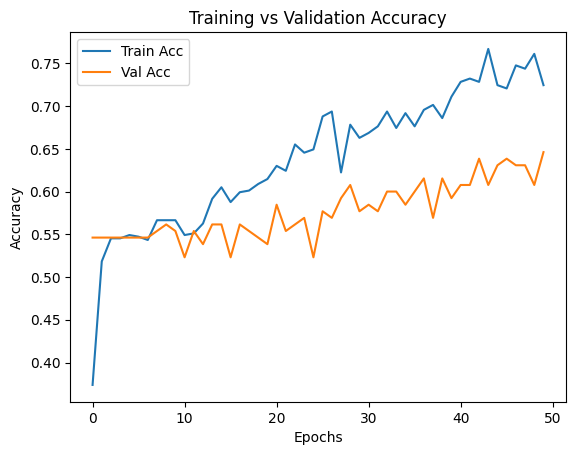

In [ ]:
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

data = {
    "feedback": [
        "The course was amazing and I learned a lot!",
        "I struggled with the lectures, they were confusing.",
        "Assignments were helpful but too many.",
        "Great teacher, explained concepts clearly.",
        "I didn’t like the exams, very stressful.",
        "Loved the project work, very practical.",
        "The material was boring and hard to follow.",
        "Excellent explanations, I feel confident now."
    ],
    "performance": [1, 0, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
print(df)


                                            feedback  performance
0        The course was amazing and I learned a lot!            1
1  I struggled with the lectures, they were confu...            0
2             Assignments were helpful but too many.            0
3         Great teacher, explained concepts clearly.            1
4           I didn’t like the exams, very stressful.            0
5            Loved the project work, very practical.            1
6        The material was boring and hard to follow.            0
7      Excellent explanations, I feel confident now.            1


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

df["clean_feedback"] = df["feedback"].apply(preprocess_text)
print(df[["feedback", "clean_feedback"]])


                                            feedback  \
0        The course was amazing and I learned a lot!   
1  I struggled with the lectures, they were confu...   
2             Assignments were helpful but too many.   
3         Great teacher, explained concepts clearly.   
4           I didn’t like the exams, very stressful.   
5            Loved the project work, very practical.   
6        The material was boring and hard to follow.   
7      Excellent explanations, I feel confident now.   

                             clean_feedback  
0                course amazing learned lot  
1              struggled lectures confusing  
2                  assignments helpful many  
3  great teacher explained concepts clearly  
4                didnt like exams stressful  
5              loved project work practical  
6               material boring hard follow  
7     excellent explanations feel confident  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()

df["sentiment"] = df["feedback"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment_label"] = df["sentiment"].apply(lambda x: "positive" if x > 0 else "negative")

print(df[["feedback", "sentiment", "sentiment_label", "performance"]])


                                            feedback  sentiment  \
0        The course was amazing and I learned a lot!     0.6239   
1  I struggled with the lectures, they were confu...    -0.5106   
2             Assignments were helpful but too many.     0.2263   
3         Great teacher, explained concepts clearly.     0.7783   
4           I didn’t like the exams, very stressful.    -0.2716   
5            Loved the project work, very practical.     0.5994   
6        The material was boring and hard to follow.    -0.4019   
7      Excellent explanations, I feel confident now.     0.7845   

  sentiment_label  performance  
0        positive            1  
1        negative            0  
2        positive            0  
3        positive            1  
4        negative            0  
5        positive            1  
6        negative            0  
7        positive            1  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


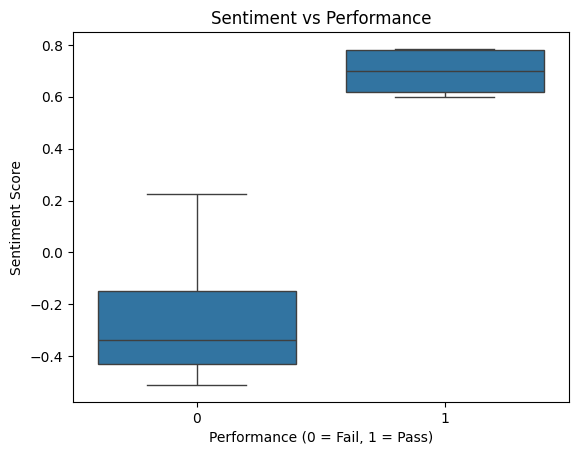

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["performance"], y=df["sentiment"])
plt.xlabel("Performance (0 = Fail, 1 = Pass)")
plt.ylabel("Sentiment Score")
plt.title("Sentiment vs Performance")
plt.show()


# **Ethics in AI**

**Anonymization:**




*   I only used numerical/categorical features (grades, absences, studytime, etc.).
*   No personally identifiable information (PII) like student names, addresses, or IDs.


 This ensures students cannot be re-identified.


# **Bias Considerations**

**Gender Bias:**

the dataset is imbalanced by gender females outnumbers males , the model may unfairly favor famelas.

**Socioeconomic Bias:**

Features like Medu, Fedu, Mjob, Fjob, and internet can proxy socioeconomic status.

The model might unfairly predict higher "risk" for students from lower-educated families.

**Fairness Concern:**

Students with the same performance but different background features might get different predictions.